In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
print(engine.table_names())


['measurement', 'station']


In [8]:
# Save references to each table
Station = Base.classes.station
Measurement = Base.classes.measurement

In [9]:
# Create our session (link) from Python to the DB
Base.metadata.create_all(engine)
session = Session(bind=engine)

In [10]:
# See table columns
engine.execute("SELECT * FROM station").keys()

['id', 'station', 'name', 'latitude', 'longitude', 'elevation']

In [11]:
# See table columns
engine.execute("SELECT * FROM measurement").keys()

['id', 'station', 'date', 'prcp', 'tobs']

# Exploratory Climate Analysis

In [12]:
# engine.execute("SELECT date, prcp FROM measurement WHERE date >= '2016-08-23'").fetchall()

In [13]:
# Order date by descending to find last date is 2017-08-23
last_date = session.query(Measurement.date, Measurement.prcp).order_by(Measurement.date.desc()).first()

# Calculate the date 1 year ago from the last data point in the database
# Date one year ago = 2016-08-23
one_year_ago = dt.date(2017, 8, 23) - dt.timedelta(days=365)
one_year_ago

datetime.date(2016, 8, 23)

In [14]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
last_12_mo = session.query(Measurement.date, Measurement.prcp).order_by(Measurement.date.desc()).\
    filter(Measurement.date >= one_year_ago).all()

# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column
date_prcp_df = pd.DataFrame(last_12_mo, columns=['date', 'precipitation'])
date_prcp_df = date_prcp_df.set_index("date")

# Sort the dataframe by date
date_prcp_df = date_prcp_df.sort_values(by=['date'], ascending=True)
date_prcp_df

,precipitation
date,
2016-08-23,0.70
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,1.79
2016-08-23,NaN
...,...
2017-08-22,0.00
2017-08-23,0.45
2017-08-23,0.08


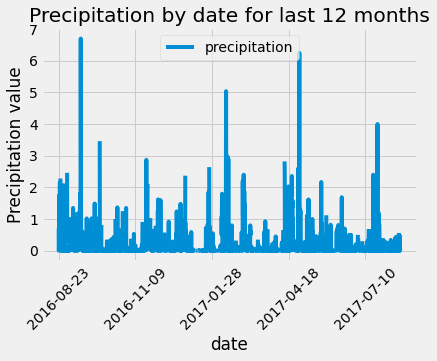

In [15]:
# Use Pandas Plotting with Matplotlib to plot the data
date_prcp_df.plot(y="precipitation")
plt.xticks(rotation=45)
plt.title("Precipitation by date for last 12 months")
plt.ylabel("Precipitation value")
plt.show()

In [16]:
# Use Pandas to calcualte the summary statistics for the precipitation data
date_prcp_df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [17]:
# Design a query to show how many stations are available in this dataset?
station_count = session.query(Station.station).count()
station_count

9

In [18]:
# What are the most active stations? (i.e. what stations have the most rows)?
active_stations = session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc())

# List the stations and the counts in descending order.
for x in active_stations:
    print(x)

('USC00519281', 2772)
('USC00519397', 2724)
('USC00513117', 2709)
('USC00519523', 2669)
('USC00516128', 2612)
('USC00514830', 2202)
('USC00511918', 1979)
('USC00517948', 1372)
('USC00518838', 511)


In [19]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station

top_station = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
    filter(Measurement.station == 'USC00519281').all()
top_station

[(54.0, 85.0, 71.66378066378067)]

In [20]:
# # Choose the station with the highest number of temperature observations.
# # Query the last 12 months of temperature observation data for this station and plot the results as a histogram

# active_12mo = session.query(Measurement.date, Measurement.tobs).order_by(Measurement.date.asc()).\
#     filter(Measurement.station == 'USC00519281').\
#     filter(Measurement.date >= one_year_ago).all()

# active_12mo
one_year_ago

datetime.date(2016, 8, 23)

In [21]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

active_12mo = session.query(Measurement.tobs).order_by(Measurement.tobs.asc()).\
    filter(Measurement.station == 'USC00519281').\
    filter(Measurement.date >= one_year_ago).all()

active_12mo = list(np.ravel(active_12mo))
active_12mo

[59.0,
 59.0,
 59.0,
 60.0,
 60.0,
 61.0,
 62.0,
 62.0,
 62.0,
 62.0,
 62.0,
 62.0,
 63.0,
 63.0,
 63.0,
 63.0,
 64.0,
 64.0,
 64.0,
 65.0,
 65.0,
 65.0,
 65.0,
 65.0,
 65.0,
 65.0,
 66.0,
 66.0,
 66.0,
 66.0,
 66.0,
 67.0,
 67.0,
 67.0,
 67.0,
 67.0,
 67.0,
 67.0,
 67.0,
 67.0,
 67.0,
 67.0,
 67.0,
 67.0,
 67.0,
 67.0,
 68.0,
 68.0,
 68.0,
 68.0,
 68.0,
 68.0,
 68.0,
 68.0,
 68.0,
 68.0,
 68.0,
 68.0,
 69.0,
 69.0,
 69.0,
 69.0,
 69.0,
 69.0,
 69.0,
 69.0,
 69.0,
 69.0,
 69.0,
 69.0,
 69.0,
 69.0,
 69.0,
 69.0,
 69.0,
 69.0,
 69.0,
 70.0,
 70.0,
 70.0,
 70.0,
 70.0,
 70.0,
 70.0,
 70.0,
 70.0,
 70.0,
 70.0,
 70.0,
 70.0,
 70.0,
 70.0,
 70.0,
 70.0,
 70.0,
 70.0,
 70.0,
 70.0,
 70.0,
 71.0,
 71.0,
 71.0,
 71.0,
 71.0,
 71.0,
 71.0,
 71.0,
 71.0,
 71.0,
 71.0,
 71.0,
 71.0,
 71.0,
 71.0,
 71.0,
 71.0,
 71.0,
 72.0,
 72.0,
 72.0,
 72.0,
 72.0,
 72.0,
 72.0,
 72.0,
 72.0,
 72.0,
 72.0,
 72.0,
 72.0,
 72.0,
 72.0,
 72.0,
 72.0,
 72.0,
 72.0,
 72.0,
 72.0,
 72.0,
 73.0,
 73.0,
 73.0,
 73.0,

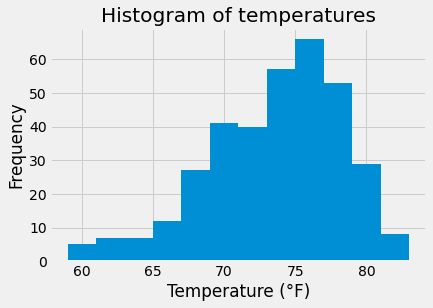

In [22]:
active_12mo
plt.hist(active_12mo, bins=12)
plt.title("Histogram of temperatures")
plt.xlabel("Temperature (°F)")
plt.ylabel("Frequency")
plt.show()

In [23]:
session.close()

## Bonus Challenge Assignment

In [24]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")


[(62.0, 69.15384615384616, 77.0)]

In [70]:
# calculate the daily normals for your trip

# push each tuple of calculations into a list called `normals`
normals = []

# Set the start and end date of the trip
start_trip = "05-01-2016"
end_trip = "05-07-2016"

# Use the start and end date to create a range of dates
rangedates = pd.date_range(start=start_trip, end=end_trip)

# Strip off the year and save a list of %m-%d strings
md_dates = rangedates.strftime("%m-%d")

# Loop through the list of %m-%d strings and calculate the normals for each date
for date in md_dates:
    normals.append(tuple(np.ravel(daily_normals(date))))

normals

[(65.0, 72.75925925925925, 79.0),
 (65.0, 73.05084745762711, 79.0),
 (67.0, 73.41071428571429, 84.0),
 (65.0, 73.59649122807018, 78.0),
 (67.0, 73.39655172413794, 79.0),
 (66.0, 73.14035087719299, 80.0),
 (64.0, 71.78846153846153, 79.0)]

In [78]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index
normals_df = pd.DataFrame(np.array(normals),
            columns=['min', 'average', 'max'])

normals_df['date'] = rangedates
normals_df = normals_df.set_index('date')
normals_df

,min,average,max
date,,,
2016-05-01,65.0,72.759259,79.0
2016-05-02,65.0,73.050847,79.0
2016-05-03,67.0,73.410714,84.0
2016-05-04,65.0,73.596491,78.0
2016-05-05,67.0,73.396552,79.0
2016-05-06,66.0,73.140351,80.0
2016-05-07,64.0,71.788462,79.0


<AxesSubplot:xlabel='date'>

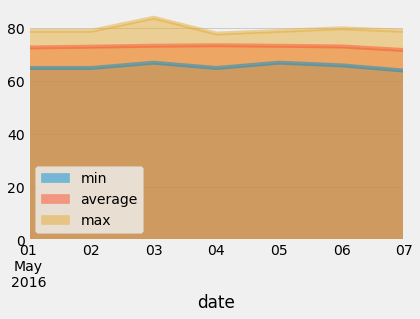

In [80]:
# Plot the daily normals as an area plot with `stacked=False`
normals_df.plot.area(stacked=False)

In [82]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [84]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
print(calc_temps('2016-05-01', '2016-05-07'))

[(66.0, 73.81818181818181, 79.0)]

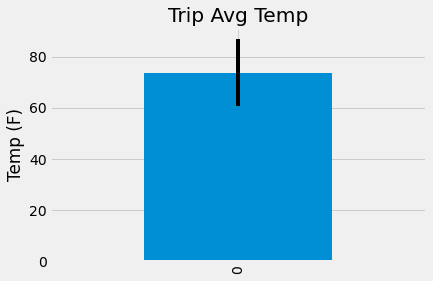

In [117]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
trip_avg_temp = calc_temps('2016-05-01', '2016-05-07')
trip_avg_temp_df = pd.DataFrame(np.array(trip_avg_temp),
                               columns=['min','avg','max'])

yerr_temp = trip_avg_temp_df['max'] - trip_avg_temp_df['min']
y_value = trip_avg_temp_df['avg']
# trip_avg_temp_df.plot.bar()

y_value.plot(kind='bar', yerr=yerr_temp)
plt.ylabel('Temp (F)')
plt.title('Trip Avg Temp')
plt.show()

In [144]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation

# session.query('')
trip_station = pd.read_sql("SELECT name, station, latitude, longitude, elevation FROM station", engine)
trip_station

trip_measurement = pd.read_sql("SELECT prcp, station, date FROM measurement", engine)
trip_measurement

trip_measurement = trip_measurement[(trip_measurement['date'] >= '2015-05-01') & (trip_measurement['date'] <= '2015-05-07')]
trip_measurement

trip_df = pd.merge(trip_station, trip_measurement, on='station', how='right')


trip_df = trip_df.sort_values(by='prcp', ascending=False)
trip_df

,name,station,latitude,longitude,elevation,prcp,date
38,"MANOA LYON ARBO 785.2, HI US",USC00516128,21.33310,-157.80250,152.4,1.79,2015-05-01
42,"MANOA LYON ARBO 785.2, HI US",USC00516128,21.33310,-157.80250,152.4,1.27,2015-05-05
41,"MANOA LYON ARBO 785.2, HI US",USC00516128,21.33310,-157.80250,152.4,0.21,2015-05-04
26,"WAIHEE 837.5, HI US",USC00519281,21.45167,-157.84889,32.9,0.18,2015-05-01
13,"KUALOA RANCH HEADQUARTERS 886.9, HI US",USC00514830,21.52130,-157.83740,7.0,0.12,2015-05-01
32,"WAIHEE 837.5, HI US",USC00519281,21.45167,-157.84889,32.9,0.09,2015-05-07
0,"WAIKIKI 717.2, HI US",USC00519397,21.27160,-157.81680,3.0,0.06,2015-05-01
4,"WAIKIKI 717.2, HI US",USC00519397,21.27160,-157.81680,3.0,0.05,2015-05-05
7,"KANEOHE 838.1, HI US",USC00513117,21.42340,-157.80150,14.6,0.05,2015-05-01
19,"WAIMANALO EXPERIMENTAL FARM, HI US",USC00519523,21.33556,-157.71139,19.5,0.05,2015-05-01


In [ ]:
session.close()